In [2]:
import nltk
import pandas as pd

df=pd.read_csv('wiki_movie_plots_deduped.csv')
print(df.head())

   Release Year                             Title Origin/Ethnicity  \
0          1901            Kansas Saloon Smashers         American   
1          1901     Love by the Light of the Moon         American   
2          1901           The Martyred Presidents         American   
3          1901  Terrible Teddy, the Grizzly King         American   
4          1902            Jack and the Beanstalk         American   

                             Director Cast    Genre  \
0                             Unknown  NaN  unknown   
1                             Unknown  NaN  unknown   
2                             Unknown  NaN  unknown   
3                             Unknown  NaN  unknown   
4  George S. Fleming, Edwin S. Porter  NaN  unknown   

                                           Wiki Page  \
0  https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...   
1  https://en.wikipedia.org/wiki/Love_by_the_Ligh...   
2  https://en.wikipedia.org/wiki/The_Martyred_Pre...   
3  https://en.wikipedia.

In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB
None


In [4]:
df = df.dropna(subset=['Plot', 'Genre'])


In [5]:
genre_counts = df['Genre'].value_counts()
common_genres = genre_counts[genre_counts >= 100].index
df = df[df['Genre'].isin(common_genres) & (df['Genre'] != 'unknown')]


In [6]:
genre_mapping = {
    'science fiction': 'sci-fi',
    'sci-fi': 'sci-fi',
    'comedy drama': 'comedy-drama',
    'comedy, drama': 'comedy-drama',
    'comedy-drama': 'comedy-drama',
    'romantic comedy': 'romance',
    'romantic drama': 'romance',
    'animated': 'animation'
}
df['Genre'] = df['Genre'].replace(genre_mapping)


In [7]:
import string
df['Plot'] = df['Plot'].str.lower().str.translate(str.maketrans('', '', string.punctuation))


In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Tokenize, remove stopwords, and apply stemming
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Plot'] = df['Plot'].apply(preprocess_text)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Adjust `max_features` as needed
X = vectorizer.fit_transform(df['Plot'])

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Genre'])


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [19]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.4394293732460243
Classification Report:
                 precision    recall  f1-score   support

        action       0.53      0.11      0.18       223
     adventure       0.60      0.06      0.11       102
     animation       0.97      0.34      0.50       100
         anime       0.00      0.00      0.00        24
     biography       0.00      0.00      0.00        32
        comedy       0.45      0.57      0.50       873
  comedy-drama       0.00      0.00      0.00        94
         crime       0.00      0.00      0.00       119
   crime drama       0.00      0.00      0.00        75
         drama       0.38      0.86      0.53      1217
        family       0.00      0.00      0.00        48
       fantasy       0.00      0.00      0.00        36
     film noir       0.00      0.00      0.00        66
        horror       0.76      0.35      0.48       247
       musical       0.00      0.00      0.00        87
musical comedy       0.00      0.00      0.00     

C:\Users\mjuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mjuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mjuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

C:\Users\mjuna\AppData\Local\Temp\ipykernel_26092\1605189367.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


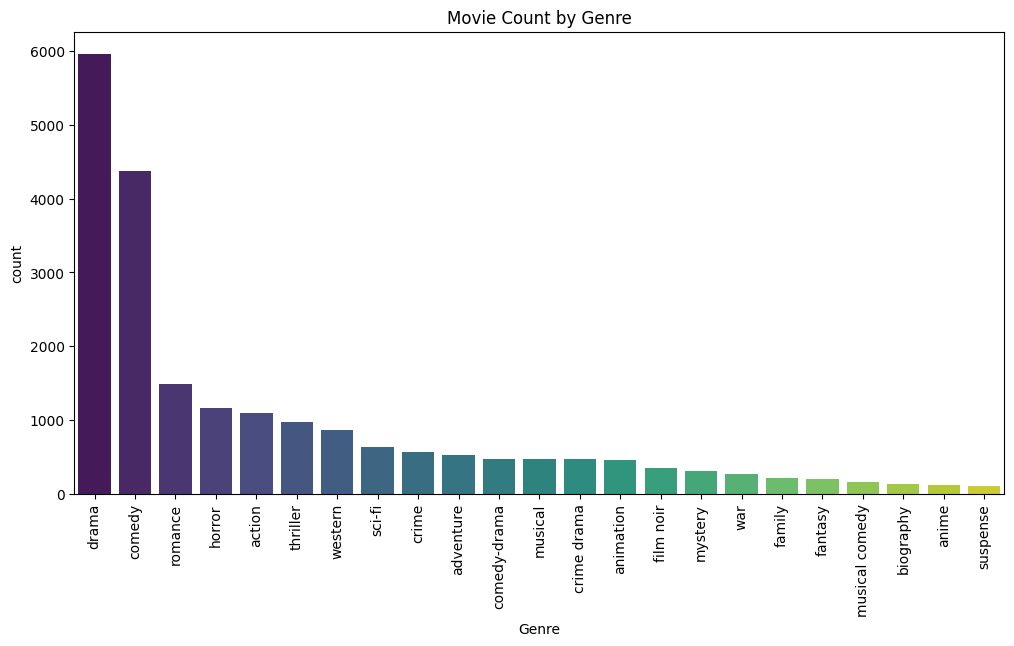

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Count genres
genre_counts = df['Genre'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Movie Count by Genre")
plt.xlabel("Genre")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()



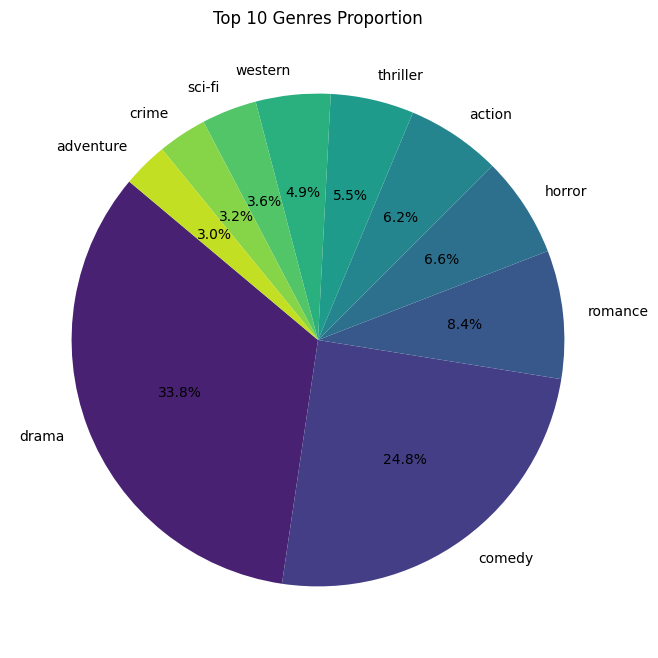

In [21]:
# Plot only the top 10 genres for clarity
top_genres = genre_counts.head(10)

# Plot
plt.figure(figsize=(8, 8))
plt.pie(top_genres.values, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", 10))
plt.title("Top 10 Genres Proportion")
plt.show()


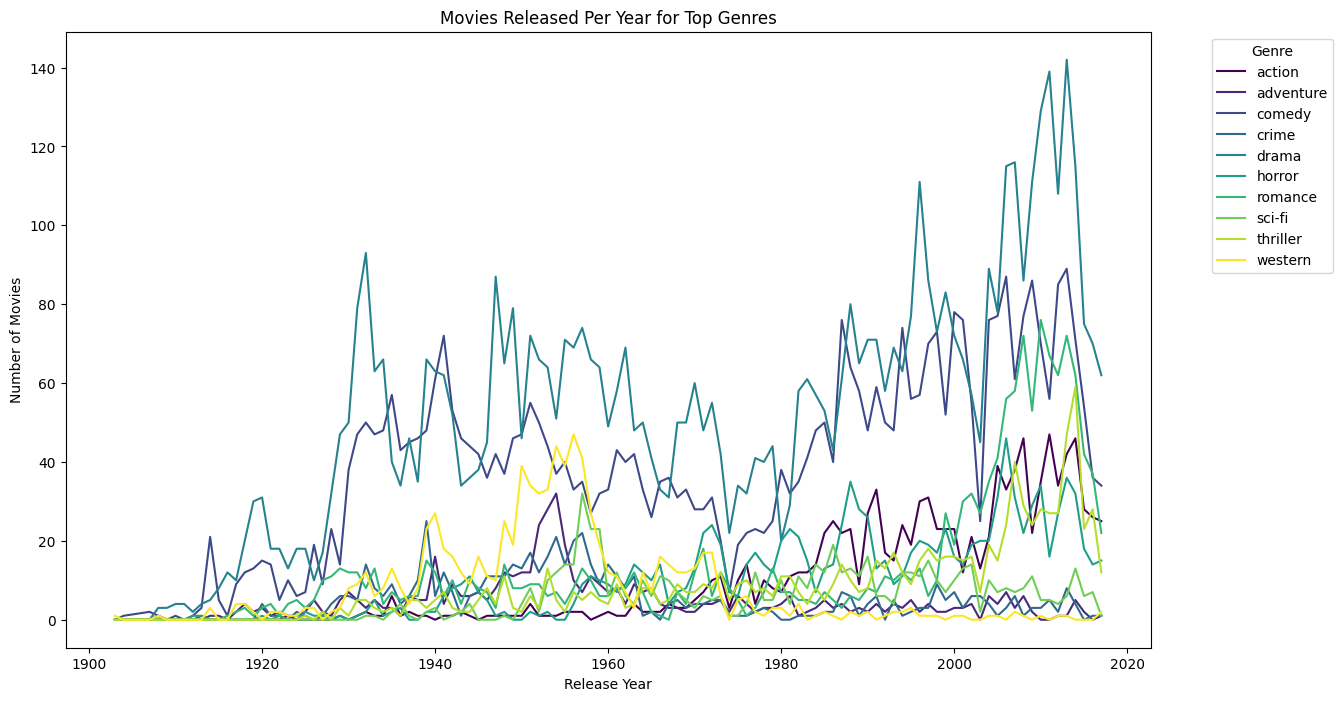

In [22]:
# Filter to include only top genres
top_genres_list = top_genres.index.tolist()
df_top_genres = df[df['Genre'].isin(top_genres_list)]

# Group by year and genre
movies_per_year = df_top_genres.groupby(['Release Year', 'Genre']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(14, 8))
movies_per_year.plot(ax=plt.gca(), cmap="viridis")
plt.title("Movies Released Per Year for Top Genres")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


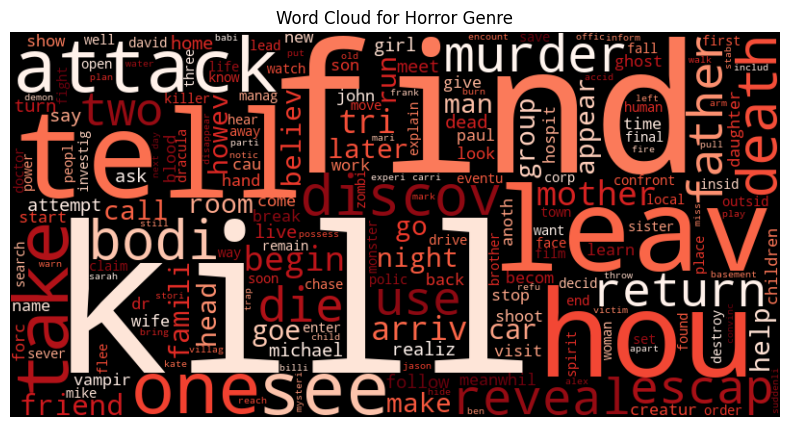

In [36]:
from wordcloud import WordCloud

# Choose a genre to analyze (e.g., 'horror')
genre_to_analyze = 'horror'
plot_text = " ".join(df[df['Genre'] == genre_to_analyze]['Plot'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(plot_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Word Cloud for {genre_to_analyze.capitalize()} Genre")
plt.show()


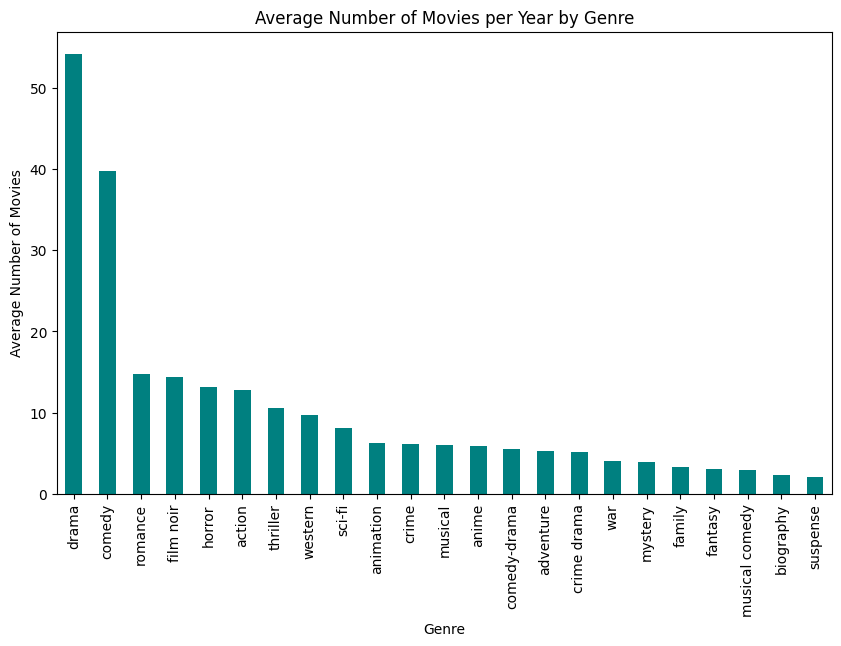

In [37]:
# Calculate the average number of movies per genre per year
movies_per_year_avg = df.groupby(['Release Year', 'Genre']).size().unstack().mean()

# Plot
plt.figure(figsize=(10, 6))
movies_per_year_avg.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Average Number of Movies per Year by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Number of Movies")
plt.xticks(rotation=90)
plt.show()


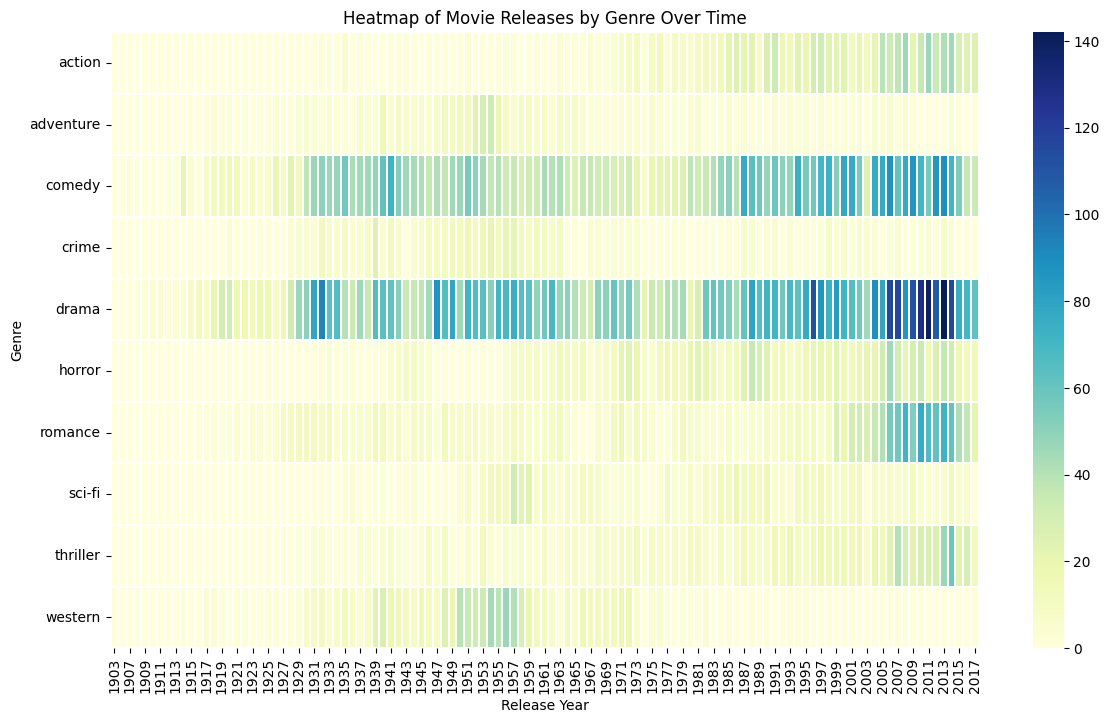

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for top genres (to simplify visualization)
top_genres = df['Genre'].value_counts().nlargest(10).index
df_top_genres = df[df['Genre'].isin(top_genres)]

# Create pivot table
genre_year = df_top_genres.pivot_table(index='Genre', columns='Release Year', aggfunc='size', fill_value=0)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(genre_year, cmap="YlGnBu", cbar=True, linecolor='white', linewidth=0.1)
plt.title("Heatmap of Movie Releases by Genre Over Time")
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.show()
